![image.png](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

# Análise Exploratória e Preditiva + Deploy Web:

# Titanic - Quem sobreviveria?

***

Análise realizada por ***Vinícius Nunes Rebeque*** em Setembro/2022

Visite meu LinkedIn: https://www.linkedin.com/in/vrebeque/

Explore meu GitHub: https://www.github.com/Rebeque

Fonte dos dados: https://www.kaggle.com/competitions/titanic/data
* * *

**1. INTRODUÇÃO:**

Esse dataset compreende os **dados históricos** do terrível acidente do "inafundável" RMS Titanic que ironicamente **afundou em 1912**. Infelizmente não haviam botes salva vidas suficientes para todos dentro do navio, o que resultou na **morte de 1502 dos 2224** totais entre passageiros e tripulação.

Enquanto houveram **elementos de sorte** que determinaram quem sobreviveu ou não ao acidente, **aparentemente** alguns grupos de pessoas tiveram **maiores chances de sobreviver**. Será que existe **alguma relação ou forma de predizer** quem sobreviveria e quais seriam os fatores determinantes para esse feito?

***Vamos analisar!***
***

**2. OBJETIVOS:**
* Praticar conceitos de manipulação de dados;
* Explorar os dados históricos do acidente;
* Verificar se existe relação entre a sobrevivência ou não dos passageiros com base no que sabemos;
* Criar um algoritmo de predição capaz de determinar a sobrevivência ou não de um indivíduo com base em atributos;
* Desenvolver uma página web para o usuário final entrar com seus dados e descobrir se ele sobreviveria ou não (verifique meu GitHub).

**Um breve comentário:** a idéia desse trabalho é **sedimentar os conhecimentos** que venho estudando em várias frentes e ainda por cima **testar minhas habilidades** em um ramo de conhecimento **que não é o meu principal** - HTML e CSS.

Acredito que **todo conhecimento é útil** e quanto mais eu conseguir **"linkar" conhecimentos** diferentes mais soluções de mercado eu posso apresentar para meus clientes. Acredito que **trabalhar com tecnologia** não permite uma zona de conforto onde eu me especialize **apenas em um ponto**. A **contextualização dos conteúdos** é de vital importância para um bom profissional.

***

**3. EXTRAÇÃO DOS DADOS:**

In [1]:
# Importação e alias das bibliotecas Python necessárias

import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
import zipfile

A Kaggle disponibilizou esse dataset já em divisão de treino e teste porque ele foi criado justamente para fins acadêmicos de aprendizado de máquina.

In [2]:
# Carrega o Dataset utilizando o pacote Pandas no alias 'df'
df_treino = pd.read_csv('data/train.csv')
df_teste = pd.read_csv('data/test.csv')

**4. EXPLORAÇÃO:**

Verificando os dados sobre o dataset

In [3]:
print(df_treino.shape)
print('\n')
print(df_teste.shape)
print('\n')
print(df_treino.columns)
print('\n')
print(df_teste.columns)

(891, 12)


(418, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


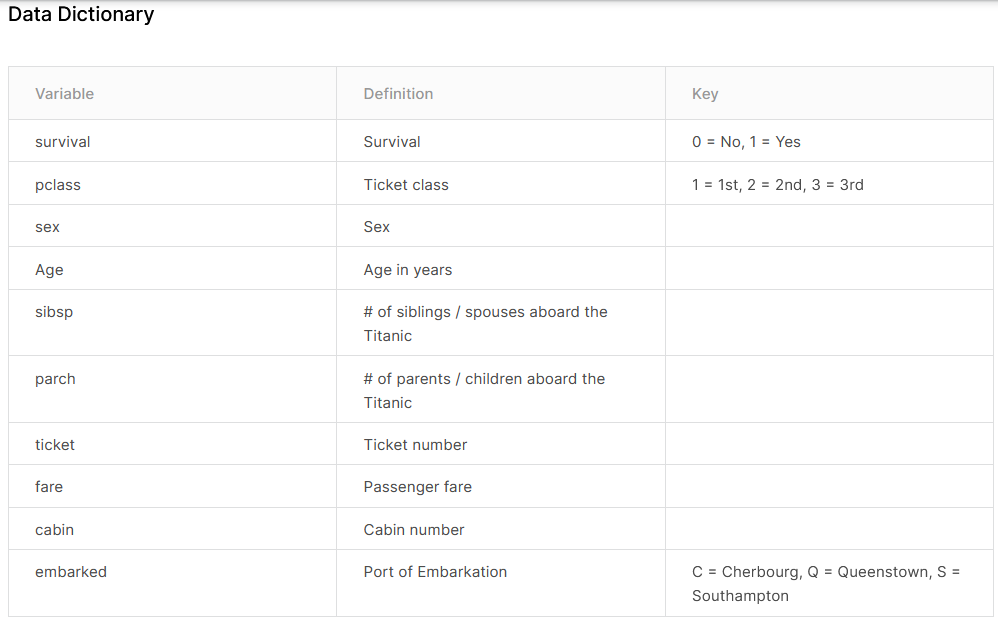

Temos 891 registros para treino e 418 para teste. Organizados em 11 features e 1 target.

In [4]:
# Primeiras linhas
df_treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Últimas linhas
df_treino.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Descrição estatística
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***
Analisando o sumário:
* Boa parte das colunas são qualitativas mas foram registradas como valores numéricos. São elas: PassengerId, Survived, Pclass. Verificarei a possibilidade e implicações em alterar essas features para seu tipo correspondente por meio da alteração numérica para string.
* A média de Pclass indica que a população média era composta em sua maioria de pessoas da segunda e terceira classe, no entanto, existia uma população considerável na primeira classe.
* A idade média da população era de 29.7 anos com variações médias consideráveis de 14.5 anos entre os indivíduos.
* Apenas um quartio dos passageiros embarcou com irmãos ou esposa, na média a cada 0.52 indivíduo um embarcou com esse tipo de acompanhante.
* O valor foi ainda menor para embarque com pais ou crianças. Em média para cada 0.38 indivíduo um embarcou com seus pais ou com uma criança.
* O preço médio da passagem paga foi de 32.2 USD, com grande variação média de 49.69 USD, provavelmente relacionados a diferença de classes. A divisão nos quartios nos mostra claramente essa diferenciação de preço entre as classes. O valor mais alto pago em uma passagem foi de 512.33 USD.

In [7]:
# Verificando informações sobre as features
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Irei trocar alguns desses tipos de dados no momento da manipulação.

In [8]:
# Verificando valores ausentes
df_treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Não temos 177 registros de idade, 687 registros de número da cabine (a maioria) e 2 registros de local de embarque. Vou decidir o que fazer com esses valores ausentes mais tarde.

**5. MANIPULAÇÃO DOS DADOS**

Vou começar traduzindo o nome das features e depois alterando seus tipos para coincidir com suas informações.

In [38]:
# Lista de colunas como está
df_treino.columns

Index(['Sobreviveu', 'Classe_Passageiro', 'Nome', 'Gênero', 'Idade',
       'N_Esposa_Irmãos', 'N_Pais_Filhos', 'Num_Passagem', 'Valor_Passagem',
       'Num_Cabine', 'Local_Embarque'],
      dtype='object')

In [56]:
# Lista de alterações nas colunas com nomes mais descritivos e em português
df_treino.rename(columns = {'PassengerId':'ID_Passageiro', 
                            'Survived':'Sobreviveu', 
                            'Pclass':'Classe_Passageiro', 
                            'Name':'Nome',
                            'Sex':'Gênero',
                            'Age':'Idade',
                            'SibSp':'N_Esposa_Irmãos',
                            'Parch':'N_Pais_Filhos',
                            'Ticket':'Num_Passagem',
                            'Fare':'Valor_Passagem',
                            'Cabin':'Num_Cabine',
                            'Embarked':'Local_Embarque'}, inplace = True)

# Nova lista de colunas
df_treino.columns

Index(['Sobreviveu', 'Classe_Passageiro', 'Nome', 'Gênero', 'Idade',
       'N_Esposa_Irmãos', 'N_Pais_Filhos', 'Num_Passagem', 'Valor_Passagem',
       'Num_Cabine', 'Local_Embarque'],
      dtype='object')

In [11]:
# Verificando
df_treino.head(1)

,ID_Passageiro,Sobreviveu,Classe_Passageiro,Nome,Gênero,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Num_Passagem,Valor_Passagem,Num_Cabine,Local_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Vou alterar o ID do passageiro para ser nosso novo índice, já que não faz sentido termos dois índices com valores únicos que representam a mesma informação.

In [12]:
# ID_Passageiro como índice
df_treino.set_index('ID_Passageiro', inplace = True)

In [13]:
# Verificando
df_treino.head(1)

,Sobreviveu,Classe_Passageiro,Nome,Gênero,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Num_Passagem,Valor_Passagem,Num_Cabine,Local_Embarque
ID_Passageiro,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Alterando os tipos de dados para condizer com o que contém:

In [14]:
# Como estava
df_treino.dtypes

Sobreviveu             int64
Classe_Passageiro      int64
Nome                  object
Gênero                object
Idade                float64
N_Esposa_Irmãos        int64
N_Pais_Filhos          int64
Num_Passagem          object
Valor_Passagem       float64
Num_Cabine            object
Local_Embarque        object
dtype: object

In [31]:
# Alterando
df_treino = df_treino.astype({'Sobreviveu':str, 
                              'Classe_Passageiro':str})

Eu havia tentado trocar as idades dos passageiros para número INTEIRO já que o dataset apresenta essas idades como DECIMAIS, porém, não é possível converter valores ausentes para INT então vou manter como está. Existe uma perda de performance mas nada que vá atrapalhar no trabalho.

In [16]:
# Como ficou
df_treino.dtypes

Sobreviveu              bool
Classe_Passageiro     object
Nome                  object
Gênero                object
Idade                float64
N_Esposa_Irmãos        int64
N_Pais_Filhos          int64
Num_Passagem          object
Valor_Passagem       float64
Num_Cabine            object
Local_Embarque        object
dtype: object

Agora nossos valores estatísticos numéricos ficam melhores apresentados

In [19]:
df_treino.describe()

,Idade,N_Esposa_Irmãos,N_Pais_Filhos,Valor_Passagem
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


Já que temos boa parte dos valores de idade ausentes, vou preenchê-los com a média dos dados que já temos. Assim nosso modelo de aprendizado de máquina terá dados para trabalhar. Em uma situação real, o ideal seria não ter tantos valores ausentes.

In [21]:
# Quantos valores ausentes temos ANTES
df_treino['Idade'].isna().sum()

177

In [22]:
# Criando um objeto média idade para a coluna
media_idade = df_treino['Idade'].mean()
media_idade

29.69911764705882

In [23]:
# Usando a função fillNA para preencher valores usando o objeto de média criado na célula anterior
df_treino['Idade'].fillna(value=media_idade, inplace=True)
print('Novos valores inseridos. Verificando por valores ausentes novamente: ')
df_treino['Idade'].isna().sum()

Novos valores inseridos. Verificando por valores ausentes novamente: 


0

Vou transcrever o mesmo código para evitar problemas com o dataset de teste, já que ele já veio dividido preciso aplicar tudo aos dois.

In [57]:
# Reprodução no dataset de validação
df_teste.rename(columns = {'PassengerId':'ID_Passageiro', 
                            'Pclass':'Classe_Passageiro', 
                            'Name':'Nome',
                            'Sex':'Gênero',
                            'Age':'Idade',
                            'SibSp':'N_Esposa_Irmãos',
                            'Parch':'N_Pais_Filhos',
                            'Ticket':'Num_Passagem',
                            'Fare':'Valor_Passagem',
                            'Cabin':'Num_Cabine',
                            'Embarked':'Local_Embarque'}, inplace = True)

df_teste.set_index('ID_Passageiro', inplace = True)

df_teste = df_teste.astype({'Classe_Passageiro':str})

KeyError: "None of ['ID_Passageiro'] are in the columns"

Acredito que as mudanças mais importantes foram feitas. Caso algo atrapalhe no caminho posso fazer durante o processo.

**6. GERANDO VISUALIZAÇÕES E INSIGHTS**

In [26]:
# Verificando o nome das nossas features novamente
df_treino.columns

Index(['Sobreviveu', 'Classe_Passageiro', 'Nome', 'Gênero', 'Idade',
       'N_Esposa_Irmãos', 'N_Pais_Filhos', 'Num_Passagem', 'Valor_Passagem',
       'Num_Cabine', 'Local_Embarque'],
      dtype='object')

<AxesSubplot:xlabel='Sobreviveu', ylabel='count'>

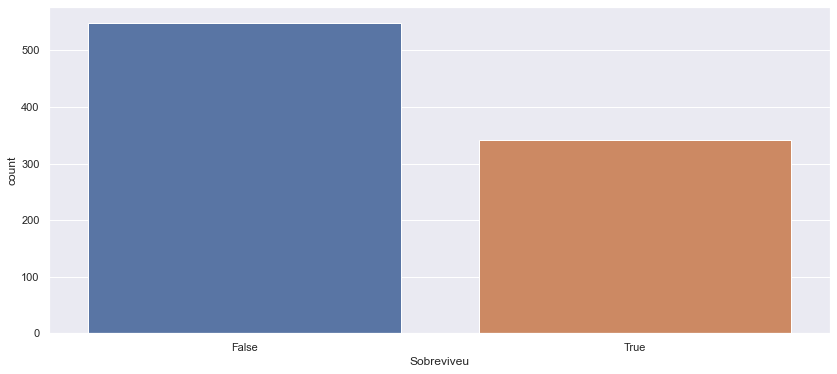

In [32]:
# Qual a proporção de pessoas que sobreviveu em relação a quem faleceu?
sns.countplot(x='Sobreviveu', data=df_treino)

Nossos dados um pouco desbalanceados, mas refletem a realidade já que são dados reais dos sobreviventes. Mais tarde podemos verificar a necessidade de fazer um balanceamento artificial nos sobreviventes para melhorar a precisão do algoritmo.

C = Cherbourg, Q = Queenstown, S = Southampton


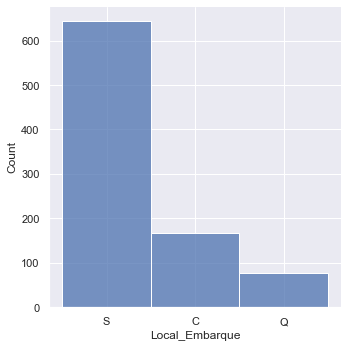

In [94]:
# Distribuição do local de embarque
plot = sns.displot(x=df_treino['Local_Embarque'])

print('C = Cherbourg, Q = Queenstown, S = Southampton')

A maioria dos passageiros saiu de Southampton que foi o ponto de partida na Inglaterra, o primeiro ponto.

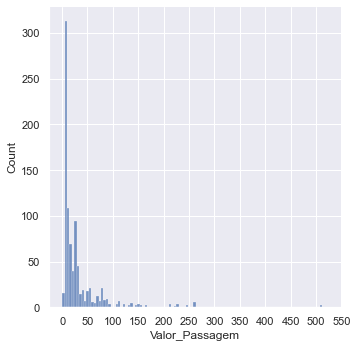

In [60]:
# Distribuição do valor pago pela passagem de cada tripulante
plot = sns.displot(x=df_treino['Valor_Passagem'])
plot.set(xticks=np.arange(0,600,50))

Aparentemente boa parte dos tripulantes pagou uma quantidade mínima no valor da passagem. Acredito que quem não pagou nada sejam funcionários e convidados de honra.

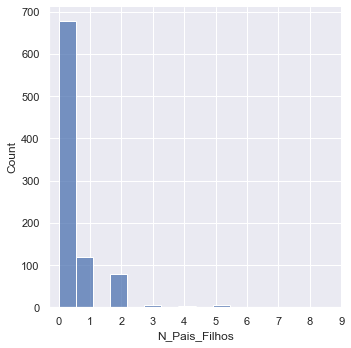

In [59]:
# Distribuição de acompanhantes pais ou filhos
plot = sns.displot(x=df_treino['N_Pais_Filhos'])
plot.set(xticks=np.arange(0,10,1))

A maioria não levou acompanhantes do tipo filhos ou pais.

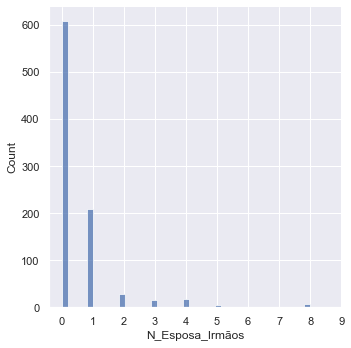

In [58]:
# Distribuição de acompanhantes esposa ou irmãos
plot = sns.displot(x=df_treino['N_Esposa_Irmãos'])
plot.set(xticks=np.arange(0,10,1))

A maioria dos tripulantes não levou esse tipo de acompanhante ou levou apenas 1.

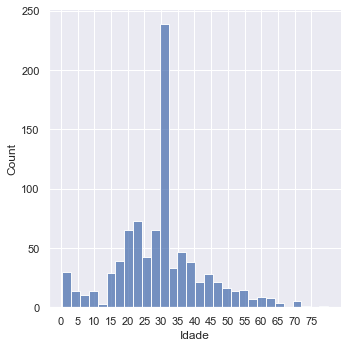

In [55]:
# Distribuição das idades dos tripulantes
plot = sns.displot(x=df_treino['Idade'])
plot.set(xticks=np.arange(0,80,5))

A maioria dos tripulantes tinha cerca de 30 anos.

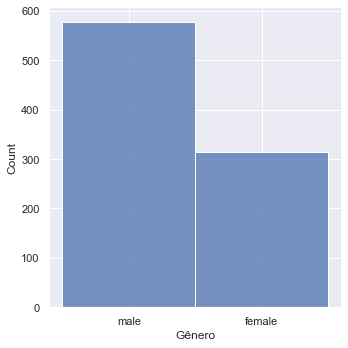

In [42]:
# Distribuição das gêneros
sns.displot(x=df_treino['Gênero'])

Quase o dobro de homens no navio.

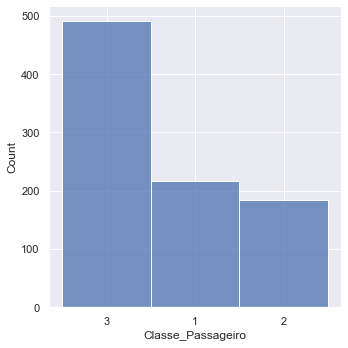

In [37]:
# Distribuição das classes na embarcação
sns.displot(x=df_treino['Classe_Passageiro'])

Maioria majoritária de passageiros na terceira classe. 